#### Simulation 
Objective:  Follow the $x$-axis using a proportional controller (Frenet frame part)  


$$\dot{s} = \frac{1}{1-d~C(s)} [(u_1-l_2~u_2)\cos\theta_e ~-~l_1~u_2~\sin\theta_e]$$  
 $$\dot{d} = (u_1 - l_2~u_2)\sin\theta_e ~+~ l_1~u_2~\cos\theta_e$$  
 $$\dot{\theta_e} = u_2-\dot(s)~C(s)$$  


We wish to follow the x-axis (i.e. straight line) thus..
    $$C(s) = 0$$
    $$l_2=0$$  
    


This simplifies the frenet frame to  
$$\dot{s} = [u_1~\cos\theta_e -l_1u_2\sin\theta_e]$$
$$\dot{d} = (u_1)\sin\theta_e  + l_1u_2\cos\theta_e~~$$
$$\dot{\theta_e} = u_2~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$  

Now suitable choosing the variables  
$$x_{pos}=s $$
$$y_{pos}=d$$
$$\theta=\theta_e$$

We get the new model for our robot(unicycle)

Writing decoupled form
$$
\dot x_p = [u_1~\cos\theta_e - l_1u_2\sin\theta_e]$$
$$\dot y_p  = (u_1)\sin\theta_e + l_1u_2\cos\theta_e~~$$
$$\dot{\theta} = u_2~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$   

This further reduces to  
$$ \left| \begin{array}{c}
\dot{x_p} \\
\dot{y_p} \\
\dot\theta_e \end{array} \right|=\left| \begin{array}{cc}
\cos\theta & -l_1 \sin\theta \\
\sin\theta & l_1 \cos\theta \\
0 & 1\end{array} \right|~\left| \begin{array}{c}
u_1 \\
u_2 \end{array} \right|$$  

The objective is to derive a control law  
$$\left| \begin{array}{c}
\dot{x_p} \\
\dot{y_p} \end{array} \right|=\left| \begin{array}{c}
v_1 \\
v_2 \end{array} \right|$$  

The above relation gives
$$\left| \begin{array}{c}
u_1 \\
u_2 \end{array} \right|= \left| \begin{array}{cc}
\cos\theta & -l_1 \sin\theta \\
\sin\theta & l_1 \cos\theta \end{array} \right|^{-1}~\left| \begin{array}{c}
v_1 \\
v_2 \end{array} \right|
$$


Choosing proportional control  
$$\left| \begin{array}{c}
v_1 \\
v_2 \end{array} \right| = \left| \begin{array}{c}
-k_1~x_e \\
-k_2~y_e\end{array} \right|= -~\left| \begin{array}{c}
k_1 (x_p - x_r) \\
k_2 (y_p - y_r) \end{array} \right|$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from lab4 import bot_unicycle

fig_size=[0, 0]
fig_size[0] = 14
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

[5, 2, 0.5235987755982988]


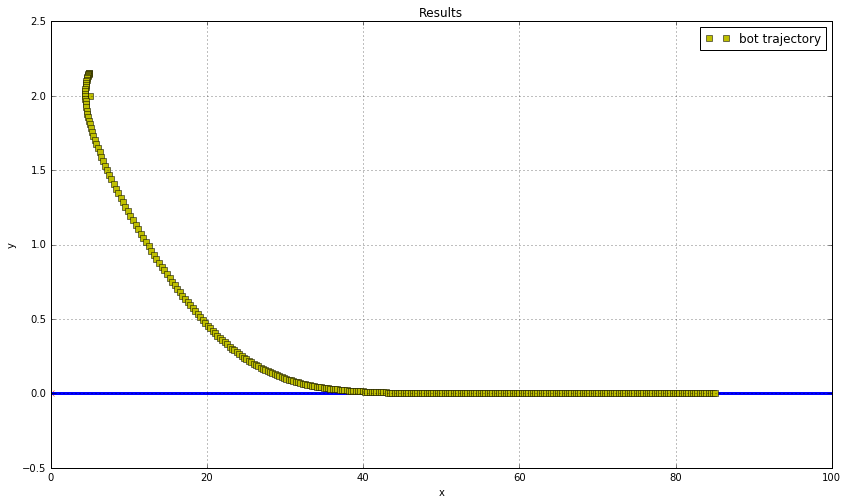

In [39]:

## time
t = np.linspace(0,200,700)

## Initial conditions, x_0, y_0, theta_0.
initial_pose = [5,2, np.pi/6.0]     

## define l1 as 5cm
l1 = 5

## Create the bot
bot = bot_unicycle(1, l1, initial_pose) 


## mark the initial positions on the plot
plt.plot(0,0,'rx')  ## Marking the origin

plt.plot([0,100],[0,0],'b',linewidth=3)

plt.plot(initial_pose[0], initial_pose[1], 'ys', label='bot trajectory')  # Marking the leaders initial position

delta = 0.007    # Time difference between two successive events
heading = 0.0    # Initial heading for leader

v = [1.0, 5.0]   # Input vector (first input -> forward velocity, second input -> angular velocity)

k1 = 0.3
k2 = 0.07

## Begin the simulation
for i in range(300):
    x, y, heading = bot.step(i*delta, v)
    if i>0:
        plt.plot(x, y, 'ys')
        x_ref = t[i]
        y_ref = 0
        
        x_e = x-x_ref
        y_e = y-y_ref
        
        v1 = -k1 * x_e
        v2 = -k2 * y_e
        
        u = np.linalg.inv(np.matrix([[np.cos(heading), -l1*np.sin(heading)], [np.sin(heading), l1*np.cos(heading)]]))*np.matrix([[v1],[v2]])
        v = [u.tolist()[0][0], u.tolist()[1][0]]
        #v = u.tolist()
        

plt.title('Results')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.ylim(-0.5,2.5)
plt.grid()
plt.show()